Forked from 01-Some minor improvements and plot images for visual checks

**First Try - HOMESTAGING With Style Transfer **
El objetivo de  este notebook es estudiar la viabilidad del TFM propuesto HomeStagin with style transfer and adversarial network
Se pretende pasar de una imagen de una habitación destrozada a una habitación completamente reformada
EN ESTE CASO PARA HACERLO FACIL INTENTAREMOS PASAR EL ESTILO DE UNA CASA BARROCA A ESTILO MODERNO Y VICEVERSA

COMEDOR BARROCO
![Input](http://comedores.decoutil.com/Imagenes/comedor-de-decoracion-barroca.jpg)

COMEDOR MODERNO
![Target](https://homecenterco.scene7.com/is/image/SodimacCO/330339_1?$producto495$&id=cKxRz2&fmt=jpg&fit=constrain,1&wid=380&hei=380)

Cosas que se han echo:

* Se ha creado un dataset manual con imagenes descargadas de Yandex images(google images funciona muy mal)
* Folders /barroco/ y /modernist/
* Vamos a intentar cargar las images
* Establecer un Heigth/Witdh para todas las imagenes
* Empezaremos con un augmentador de datos ya que solo tenemos 100 imagenes de cada estilo
* El generador random para la GAN
* En este primer intento usaremos la arquitectura CycleGAN desarrollada en el Git https://github.com/eriklindernoren/Keras-GAN/tree/master/cyclegan


In [1]:
import numpy as np
import pandas as pd
import os
from skimage.transform import resize
from keras.preprocessing.image import array_to_img, img_to_array, load_img#,save_img
from skimage.io import imread, imshow #, concatenate_images
import PIL 
from PIL import Image
import re

Using TensorFlow backend.


In [2]:
!mkdir images
!ls -l '.'

total 8
-rw-r--r-- 1 root root  199 Mar 24 10:58 __notebook_source__.ipynb
drwxr-xr-x 2 root root 4096 Mar 24 10:58 images


In [3]:
!ls -l '../input/barroco/'

total 12
drwxr-xr-x 2 root root 12288 Mar 17 18:46 barroco


In [4]:
!ls -l '../input/modernist/modernist'

total 64588
-rw-r--r-- 1 root root 2039093 Mar 17 18:46 064_065_contenitori.jpg
-rw-r--r-- 1 root root  427692 Mar 17 18:46 10-ideas-grey-and-plum-living-room-ideas-amazing-design.jpg
-rw-r--r-- 1 root root  460497 Mar 17 18:46 10-why-choosing-small-living-room-ideas-modern-amazing-design.jpg
-rw-r--r-- 1 root root  317382 Mar 17 18:46 11-cool-luxury-minimalist-living-room-on-a-budget.jpg
-rw-r--r-- 1 root root  317167 Mar 17 18:46 11-stylish-small-living-room-modern-tips.jpg
-rw-r--r-- 1 root root   67938 Mar 17 18:46 126382241.jpg
-rw-r--r-- 1 root root  450547 Mar 17 18:46 13-affordable-small-living-room-ideas-modern-amazing-design.jpg
-rw-r--r-- 1 root root   79265 Mar 17 18:46 333812033667468073_1803f8b310af.jpg
-rw-r--r-- 1 root root  506555 Mar 17 18:46 341-56a5d09b46694.jpg
-rw-r--r-- 1 root root  139651 Mar 17 18:46 351637_living-room_1600x1200_h.jpg
-rw-r--r-- 1 root root  104751 Mar 17 18:46 356923_chair-interior-design-living-room-sofa-table_1920x1200_h.jpg
-rw-r--r-- 1 roo

In [5]:
input_dir = "../input/barroco/barroco/"
target_dir = "../input/modernist/modernist/"

In [6]:
heigh=256
width=256
chanels=3

Usefull function to downsample(or upsample) and resize at fixed size all images

In [7]:
def downsample(img):
    return resize(img, (heigh, width), mode='constant', preserve_range=True)

Get all files given a path default only .jpg extension

In [8]:
def files_names_in_path(path="",extension=".jpg"):
    files = []
    for f in os.listdir(path):
        filename, file_extension = os.path.splitext(f)
        if file_extension == '.jpg':
            files.append(path+f)
    return files

input_files = files_names_in_path(input_dir)
target_files = files_names_in_path(target_dir)
print(input_files[0:5])
print(target_files[0:5])

['../input/barroco/barroco/18-oDfKpVCzQnrd-1-1.jpg', '../input/barroco/barroco/Furniture-model-2019-25.jpg', '../input/barroco/barroco/58524d507b8c7.jpg', '../input/barroco/barroco/5233ae5869775694ad564e9f4bd9253e.jpg', '../input/barroco/barroco/italian-living-room-italian-living-room-furniture.jpg']
['../input/modernist/modernist/lovely-living-room-sectional-layout-ideas-for-living-room-elegant-modern-living-room-designs.jpg', '../input/modernist/modernist/Modern-Tv-Wall-Unit-latest-wall-unit-designs-Modern-TV-Wall-Unit-by-Presotto-Design.jpg', '../input/modernist/modernist/best-interior-design-of-living-room-47637320.jpg', '../input/modernist/modernist/impressive-fireplace-living-room-modern-living-room-small-living-small-apartment-fireplace-modern-lg-9a6bae95615780d1.jpg', '../input/modernist/modernist/modern-small-sitting-room-ideas.jpg']


Given a file load in numpy resize and normalize

In [9]:
def load_image_and_normalize_and_resize(file_path="",normalize=True):
    if normalize:
        return (downsample(imread(file_path))/127.5)-1
    else:
        return downsample(imread(file_path))
    

load_image_and_normalize_and_resize(np.random.choice(input_files,1)[0])

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


array([[[-0.71801471, -0.83566176, -0.89056373],
        [-0.68664216, -0.80428922, -0.85919118],
        [-0.69377968, -0.81142674, -0.8663287 ],
        ...,
        [-0.28045152, -0.42162799, -0.53143191],
        [-0.31526405, -0.45644053, -0.56624445],
        [-0.28627451, -0.42745098, -0.5372549 ]],

       [[-0.7814951 , -0.89914216, -0.95404412],
        [-0.71388825, -0.83153531, -0.88643727],
        [-0.71192076, -0.82956782, -0.88446978],
        ...,
        [-0.26308498, -0.40426145, -0.51406537],
        [-0.18613281, -0.32730928, -0.4371132 ],
        [-0.30496324, -0.44613971, -0.55594363]],

       [[-0.83459042, -0.9365512 , -0.98361003],
        [-0.81638806, -0.91834884, -0.96540767],
        [-0.80703029, -0.90899108, -0.9560499 ],
        ...,
        [-0.14802007, -0.28919654, -0.39900046],
        [-0.28165116, -0.42282763, -0.53263155],
        [-0.2959262 , -0.43710267, -0.54690659]],

       ...,

       [[ 0.22610103,  0.03002259, -0.00919309],
        [ 0

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


AxesImage(10.8,27.8;410.4x245.4)


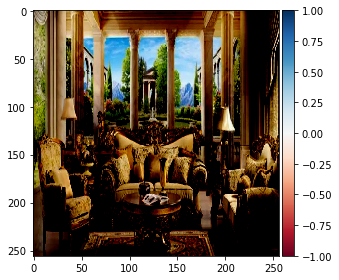

In [10]:
print(imshow(load_image_and_normalize_and_resize(np.random.choice(input_files,2)[0])))

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


AxesImage(10.8,27.8;410.4x245.4)


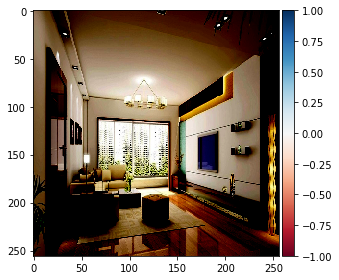

In [11]:

#imshow(load_image_and_normalize_and_resize(input_dir+np.random.choice(input_files,1)[0]))
print(imshow(load_image_and_normalize_and_resize(np.random.choice(target_files,2)[1])))


Generator for gan only return a random files

In [12]:
import imgaug as ia
from imgaug import augmenters as iaa
sometimes = lambda aug: iaa.Sometimes(0.5, aug)

# Define our sequence of augmentation steps that will be applied to every image
# All augmenters with per_channel=0.5 will sample one value _per image_
# in 50% of all cases. In all other cases they will sample new values
# _per channel_.
seq = iaa.Sequential(
    [
        # apply the following augmenters to most images
        iaa.Fliplr(0.5), # horizontally flip 50% of all images
        iaa.Flipud(0.2), # vertically flip 20% of all images
        # crop images by -5% to 10% of their height/width
        sometimes(iaa.CropAndPad(
            percent=(-0.05, 0.1),
            pad_mode=ia.ALL,
            pad_cval=(0, 255)
        )),
        sometimes(iaa.Affine(
            scale={"x": (0.8, 1.2), "y": (0.8, 1.2)}, # scale images to 80-120% of their size, individually per axis
            translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)}, # translate by -20 to +20 percent (per axis)
            rotate=(-45, 45), # rotate by -45 to +45 degrees
            shear=(-16, 16), # shear by -16 to +16 degrees
            order=[0, 1], # use nearest neighbour or bilinear interpolation (fast)
            cval=(0, 255), # if mode is constant, use a cval between 0 and 255
            mode=ia.ALL # use any of scikit-image's warping modes (see 2nd image from the top for examples)
        )),
        # execute 0 to 5 of the following (less important) augmenters per image
        # don't execute all of them, as that would often be way too strong
        iaa.SomeOf((0, 5),
            [
               # sometimes(iaa.Superpixels(p_replace=(0, 1.0), n_segments=(20, 200))), # convert images into their superpixel representation
                iaa.OneOf([
                    iaa.GaussianBlur((0, 3.0)), # blur images with a sigma between 0 and 3.0
                    iaa.AverageBlur(k=(2, 7)), # blur image using local means with kernel sizes between 2 and 7
                    iaa.MedianBlur(k=(3, 11)), # blur image using local medians with kernel sizes between 2 and 7
                ]),
             #   iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)), # sharpen images
             #   iaa.Emboss(alpha=(0, 1.0), strength=(0, 2.0)), # emboss images
                # search either for all edges or for directed edges,
                # blend the result with the original image using a blobby mask
             #   iaa.SimplexNoiseAlpha(iaa.OneOf([
             #       iaa.EdgeDetect(alpha=(0.5, 1.0)),
                    #iaa.DirectedEdgeDetect(alpha=(0.5, 1.0), direction=(0.0, 1.0)),
             #   ])),
            #    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5), # add gaussian noise to images
              #  iaa.OneOf([
              #      iaa.Dropout((0.01, 0.1), per_channel=0.5), # randomly remove up to 10% of the pixels
              #      iaa.CoarseDropout((0.03, 0.15), size_percent=(0.02, 0.05), per_channel=0.2),
             #   ]),
               # iaa.Invert(0.05, per_channel=True), # invert color channels
               # iaa.Add((-10, 10), per_channel=0.5), # change brightness of images (by -10 to 10 of original value)
                #iaa.AddToHueAndSaturation((-20, 20)), # change hue and saturation
                # either change the brightness of the whole image (sometimes
                # per channel) or change the brightness of subareas
              #  iaa.OneOf([
              #      iaa.Multiply((0.5, 1.5), per_channel=0.5),
              #      iaa.FrequencyNoiseAlpha(
              #          exponent=(-4, 0),
              #          first=iaa.Multiply((0.5, 1.5), per_channel=True),
              #          second=iaa.ContrastNormalization((0.5, 2.0))
              #      )
              #  ]),
                iaa.ContrastNormalization((0.5, 2.0), per_channel=0.5), # improve or worsen the contrast
                iaa.Grayscale(alpha=(0.0, 1.0)),
                sometimes(iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25)), # move pixels locally around (with random strengths)
                sometimes(iaa.PiecewiseAffine(scale=(0.01, 0.05))), # sometimes move parts of the image around
                sometimes(iaa.PerspectiveTransform(scale=(0.01, 0.1)))
            ],
            random_order=True
        )
    ],
    random_order=True
)



Keras working with GAN imports

In [13]:
import scipy

from keras.datasets import mnist
#from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Concatenate
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
import datetime
import matplotlib.pyplot as plt
import sys
#from data_loader import DataLoader
import numpy as np
import os

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


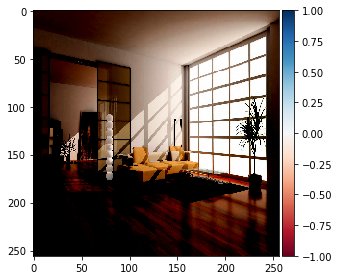

In [14]:
BATCH_SIZE=32
def generator_cyclegan(pathsA=[],pathsB=[], batch_size=32, normalize = True):
    A = np.zeros((batch_size,heigh,width,chanels))
    B = np.zeros((batch_size,heigh,width,chanels))
    #print(X.shape)
    for indx in range(batch_size):
        imgA = load_image_and_normalize_and_resize(np.random.choice(pathsA,1)[0],normalize)
        imgB = load_image_and_normalize_and_resize(np.random.choice(pathsB,1)[0],normalize)
        #print(img.shape)
        A[indx]=imgA
        B[indx]=imgB
    return A,B


sample_t,samples_in = generator_cyclegan(target_files,input_files, BATCH_SIZE)
imshow(sample_t[0])

In [15]:
from keras.layers import Layer, InputSpec
from keras import initializers, regularizers, constraints
from keras import backend as K


class InstanceNormalization(Layer):
    """Instance normalization layer.
    Normalize the activations of the previous layer at each step,
    i.e. applies a transformation that maintains the mean activation
    close to 0 and the activation standard deviation close to 1.
    # Arguments
        axis: Integer, the axis that should be normalized
            (typically the features axis).
            For instance, after a `Conv2D` layer with
            `data_format="channels_first"`,
            set `axis=1` in `InstanceNormalization`.
            Setting `axis=None` will normalize all values in each
            instance of the batch.
            Axis 0 is the batch dimension. `axis` cannot be set to 0 to avoid errors.
        epsilon: Small float added to variance to avoid dividing by zero.
        center: If True, add offset of `beta` to normalized tensor.
            If False, `beta` is ignored.
        scale: If True, multiply by `gamma`.
            If False, `gamma` is not used.
            When the next layer is linear (also e.g. `nn.relu`),
            this can be disabled since the scaling
            will be done by the next layer.
        beta_initializer: Initializer for the beta weight.
        gamma_initializer: Initializer for the gamma weight.
        beta_regularizer: Optional regularizer for the beta weight.
        gamma_regularizer: Optional regularizer for the gamma weight.
        beta_constraint: Optional constraint for the beta weight.
        gamma_constraint: Optional constraint for the gamma weight.
    # Input shape
        Arbitrary. Use the keyword argument `input_shape`
        (tuple of integers, does not include the samples axis)
        when using this layer as the first layer in a Sequential model.
    # Output shape
        Same shape as input.
    # References
        - [Layer Normalization](https://arxiv.org/abs/1607.06450)
        - [Instance Normalization: The Missing Ingredient for Fast Stylization](
        https://arxiv.org/abs/1607.08022)
    """
    def __init__(self,
                 axis=None,
                 epsilon=1e-3,
                 center=True,
                 scale=True,
                 beta_initializer='zeros',
                 gamma_initializer='ones',
                 beta_regularizer=None,
                 gamma_regularizer=None,
                 beta_constraint=None,
                 gamma_constraint=None,
                 **kwargs):
        super(InstanceNormalization, self).__init__(**kwargs)
        self.supports_masking = True
        self.axis = axis
        self.epsilon = epsilon
        self.center = center
        self.scale = scale
        self.beta_initializer = initializers.get(beta_initializer)
        self.gamma_initializer = initializers.get(gamma_initializer)
        self.beta_regularizer = regularizers.get(beta_regularizer)
        self.gamma_regularizer = regularizers.get(gamma_regularizer)
        self.beta_constraint = constraints.get(beta_constraint)
        self.gamma_constraint = constraints.get(gamma_constraint)

    def build(self, input_shape):
        ndim = len(input_shape)
        if self.axis == 0:
            raise ValueError('Axis cannot be zero')

        if (self.axis is not None) and (ndim == 2):
            raise ValueError('Cannot specify axis for rank 1 tensor')

        self.input_spec = InputSpec(ndim=ndim)

        if self.axis is None:
            shape = (1,)
        else:
            shape = (input_shape[self.axis],)

        if self.scale:
            self.gamma = self.add_weight(shape=shape,
                                         name='gamma',
                                         initializer=self.gamma_initializer,
                                         regularizer=self.gamma_regularizer,
                                         constraint=self.gamma_constraint)
        else:
            self.gamma = None
        if self.center:
            self.beta = self.add_weight(shape=shape,
                                        name='beta',
                                        initializer=self.beta_initializer,
                                        regularizer=self.beta_regularizer,
                                        constraint=self.beta_constraint)
        else:
            self.beta = None
        self.built = True

    def call(self, inputs, training=None):
        input_shape = K.int_shape(inputs)
        reduction_axes = list(range(0, len(input_shape)))

        if self.axis is not None:
            del reduction_axes[self.axis]

        del reduction_axes[0]

        mean = K.mean(inputs, reduction_axes, keepdims=True)
        stddev = K.std(inputs, reduction_axes, keepdims=True) + self.epsilon
        normed = (inputs - mean) / stddev

        broadcast_shape = [1] * len(input_shape)
        if self.axis is not None:
            broadcast_shape[self.axis] = input_shape[self.axis]

        if self.scale:
            broadcast_gamma = K.reshape(self.gamma, broadcast_shape)
            normed = normed * broadcast_gamma
        if self.center:
            broadcast_beta = K.reshape(self.beta, broadcast_shape)
            normed = normed + broadcast_beta
        return normed

    def get_config(self):
        config = {
            'axis': self.axis,
            'epsilon': self.epsilon,
            'center': self.center,
            'scale': self.scale,
            'beta_initializer': initializers.serialize(self.beta_initializer),
            'gamma_initializer': initializers.serialize(self.gamma_initializer),
            'beta_regularizer': regularizers.serialize(self.beta_regularizer),
            'gamma_regularizer': regularizers.serialize(self.gamma_regularizer),
            'beta_constraint': constraints.serialize(self.beta_constraint),
            'gamma_constraint': constraints.serialize(self.gamma_constraint)
        }
        base_config = super(InstanceNormalization, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))
class CycleGAN():
    def __init__(self):
        # Input shape
        self.img_rows = heigh
        self.img_cols = width
        self.channels = chanels
        self.img_shape = (self.img_rows, self.img_cols, self.channels)

        # Configure data loader
        self.dataset_name = 'cyclegan'
       # self.data_loader = DataLoader(dataset_name=self.dataset_name,
        #                              img_res=(self.img_rows, self.img_cols))


        # Calculate output shape of D (PatchGAN)
        patch = int(self.img_rows / 2**4)
        self.disc_patch = (patch, patch, 1)

        # Number of filters in the first layer of G and D
        self.gf = 32
        self.df = 64

        # Loss weights
        self.lambda_cycle = 10.0                    # Cycle-consistency loss
        self.lambda_id = 0.1 * self.lambda_cycle    # Identity loss

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminators
        self.d_A = self.build_discriminator()
        self.d_B = self.build_discriminator()
        self.d_A.compile(loss='mse',
            optimizer=optimizer,
            metrics=['accuracy'])
        self.d_B.compile(loss='mse',
            optimizer=optimizer,
            metrics=['accuracy'])

        #-------------------------
        # Construct Computational
        #   Graph of Generators
        #-------------------------

        # Build the generators
        self.d_A = self.build_discriminator()
        self.d_B = self.build_discriminator()
        self.d_A.compile(loss='mse',
            optimizer=optimizer,
            metrics=['accuracy'])
        self.d_B.compile(loss='mse',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build and compile the generators
        self.g_AB = self.build_generator()
        self.g_BA = self.build_generator()
        self.g_AB.compile(loss='mse', optimizer=optimizer)
        self.g_BA.compile(loss='mse', optimizer=optimizer)

        # Input images from both domains
        img_A = Input(shape=self.img_shape)
        img_B = Input(shape=self.img_shape)

        # Translate images to the other domain
        fake_B = self.g_AB(img_A)
        fake_A = self.g_BA(img_B)
        # Translate images back to original domain
        reconstr_A = self.g_BA(fake_B)
        reconstr_B = self.g_AB(fake_A)

        # For the combined model we will only train the generators
        self.d_A.trainable = False
        self.d_B.trainable = False

        # Discriminators determines validity of translated images
        valid_A = self.d_A(fake_A)
        valid_B = self.d_B(fake_B)

        self.combined = Model([img_A, img_B], [valid_A, valid_B, fake_B, fake_A, \
                                               reconstr_A, reconstr_B])
        self.combined.compile(loss=['mse', 'mse', 'mse', 'mse', 'mse', 'mse'],
                                    loss_weights=[1, 1, self.lambda_id, self.lambda_id, \
                                                  self.lambda_cycle, self.lambda_cycle],
                                    optimizer=optimizer)

    def build_generator(self):
        """U-Net Generator"""

        def conv2d(layer_input, filters, f_size=4):
            """Layers used during downsampling"""
            d = Conv2D(filters, kernel_size=f_size, strides=2, padding='same')(layer_input)
            d = LeakyReLU(alpha=0.2)(d)
            d = InstanceNormalization()(d)
            return d

        def deconv2d(layer_input, skip_input, filters, f_size=4, dropout_rate=0):
            """Layers used during upsampling"""
            u = UpSampling2D(size=2)(layer_input)
            u = Conv2D(filters, kernel_size=f_size, strides=1, padding='same', activation='relu')(u)
            if dropout_rate:
                u = Dropout(dropout_rate)(u)
            u = InstanceNormalization()(u)
            u = Concatenate()([u, skip_input])
            return u

        # Image input
        d0 = Input(shape=self.img_shape)

        # Downsampling
        d1 = conv2d(d0, self.gf)
        d2 = conv2d(d1, self.gf*2)
        d3 = conv2d(d2, self.gf*4)
        d4 = conv2d(d3, self.gf*8)

        # Upsampling
        u1 = deconv2d(d4, d3, self.gf*4)
        u2 = deconv2d(u1, d2, self.gf*2)
        u3 = deconv2d(u2, d1, self.gf)

        u4 = UpSampling2D(size=2)(u3)
        output_img = Conv2D(self.channels, kernel_size=4, strides=1, padding='same', activation='tanh')(u4)

        return Model(d0, output_img)

    def build_discriminator(self):

        def d_layer(layer_input, filters, f_size=4, normalization=True):
            """Discriminator layer"""
            d = Conv2D(filters, kernel_size=f_size, strides=2, padding='same')(layer_input)
            d = LeakyReLU(alpha=0.2)(d)
            if normalization:
                d = InstanceNormalization()(d)
            return d

        img = Input(shape=self.img_shape)

        d1 = d_layer(img, self.df, normalization=False)
        d2 = d_layer(d1, self.df*2)
        d3 = d_layer(d2, self.df*4)
        d4 = d_layer(d3, self.df*8)

        validity = Conv2D(1, kernel_size=4, strides=1, padding='same')(d4)

        return Model(img, validity)

    def train(self, epochs, batch_size=1, sample_interval=50):

        start_time = datetime.datetime.now()

        # Adversarial loss ground truths
        valid = np.ones((BATCH_SIZE,) + self.disc_patch)
        fake = np.zeros((BATCH_SIZE,) + self.disc_patch)

        for epoch in range(epochs):
            #generator_cyclegan
            #for batch_i, (imgs_A, imgs_B) in enumerate(self.data_loader.load_batch(batch_size)):
            
            imgs_A,imgs_B = generator_cyclegan(target_files,input_files,BATCH_SIZE,True)
            #imgs_A = (imgs_A / 127.5) -1
            #imgs_B = (imgs_B / 127.5) -1
            #for batch_i, (imgs_A, imgs_B) in enumerate(generator_cyclegan(target_files,input_files,BATCH_SIZE,False)):
            #for batch_i in range(BATCH_SIZE):
                #imgs_A = (imgs_A / 127.5) -1
                #imgs_B = (imgs_B / 127.5) -1
                # ----------------------
                #  Train Discriminators
                # ----------------------

                # Translate images to opposite domain
            fake_B = self.g_AB.predict(imgs_A)
            fake_A = self.g_BA.predict(imgs_B)

            # Train the discriminators (original images = real / translated = Fake)
          #  print(imgs_A.shape)
            dA_loss_real = self.d_A.train_on_batch(imgs_A, valid)
            dA_loss_fake = self.d_A.train_on_batch(fake_A, fake)
            dA_loss = 0.5 * np.add(dA_loss_real, dA_loss_fake)

            dB_loss_real = self.d_B.train_on_batch(imgs_B, valid)
            dB_loss_fake = self.d_B.train_on_batch(fake_B, fake)
            dB_loss = 0.5 * np.add(dB_loss_real, dB_loss_fake)

            # Total disciminator loss
            d_loss = 0.5 * np.add(dA_loss, dB_loss)


            # ------------------
            #  Train Generators
            # ------------------

            # Train the generators
            g_loss = self.combined.train_on_batch([imgs_A, imgs_B],
                                                    [valid, valid,
                                                    imgs_A, imgs_B,
                                                    imgs_A, imgs_B])

            elapsed_time = datetime.datetime.now() - start_time

            # Plot the progress  [Batch %d/%d]
            print ("[Epoch %d/%d] [D loss: %f, acc: %3d%%] [G loss: %05f, adv: %05f, recon: %05f, id: %05f] time: %s " \
                                                                    % ( epoch, epochs,
                                                                        #batch_i, self.data_loader.n_batches,
                                                                        d_loss[0], 100*d_loss[1],
                                                                        g_loss[0],
                                                                        np.mean(g_loss[1:3]),
                                                                        np.mean(g_loss[3:5]),
                                                                        np.mean(g_loss[5:6]),
                                                                        elapsed_time))

            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                self.sample_images(epoch)

    def sample_images(self, epoch):
        os.makedirs('images/%s' % self.dataset_name, exist_ok=True)
        r, c = 2, 3

        #imgs_A = self.data_loader.load_data(domain="A", batch_size=1, is_testing=True)
        #imgs_B = self.data_loader.load_data(domain="B", batch_size=1, is_testing=True)
        imgs_A,imgs_B = generator_cyclegan(target_files,input_files,1,True)
        #imgs_A = (imgs_A / 127.5) -1
        #imgs_B = (imgs_B / 127.5) -1
        # Demo (for GIF)
        #imgs_A = self.data_loader.load_img('datasets/apple2orange/testA/n07740461_1541.jpg')
        #imgs_B = self.data_loader.load_img('datasets/apple2orange/testB/n07749192_4241.jpg')

        # Translate images to the other domain
        fake_B = self.g_AB.predict(imgs_A)
        fake_A = self.g_BA.predict(imgs_B)
        # Translate back to original domain
        reconstr_A = self.g_BA.predict(fake_B)
        reconstr_B = self.g_AB.predict(fake_A)

        gen_imgs = np.concatenate([imgs_A, fake_B, reconstr_A, imgs_B, fake_A, reconstr_B])

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        titles = ['Original', 'Translated', 'Reconstructed']
        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt])
                axs[i, j].set_title(titles[j])
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig("images/cycle_gan_%s.png" % (epoch))
        plt.close()



In [34]:
if __name__ == '__main__':
    gan = CycleGAN()
    gan.train(epochs=500, batch_size=BATCH_SIZE, sample_interval=10)

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/opt/conda/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


[Epoch 0/500] [D loss: 21.320633, acc:  14%] [G loss: 80.577278, adv: 30.245007, recon: 0.868317, id: 0.961360] time: 0:00:32.893774 
[Epoch 1/500] [D loss: 18.365551, acc:  14%] [G loss: 35.631237, adv: 9.102534, recon: 0.872721, id: 0.914264] time: 0:00:41.479462 
[Epoch 2/500] [D loss: 6.527340, acc:  17%] [G loss: 79.185410, adv: 32.196674, recon: 0.859151, id: 0.703764] time: 0:00:52.542583 
[Epoch 3/500] [D loss: 10.243137, acc:  12%] [G loss: 15.898928, adv: 1.026144, recon: 0.915304, id: 0.636684] time: 0:00:59.099222 
[Epoch 4/500] [D loss: 3.728442, acc:  24%] [G loss: 16.805115, adv: 2.998528, recon: 0.843688, id: 0.429352] time: 0:01:06.576562 
[Epoch 5/500] [D loss: 1.169237, acc:  36%] [G loss: 12.704760, adv: 1.376752, recon: 0.879382, id: 0.356915] time: 0:01:15.493856 
[Epoch 6/500] [D loss: 0.588114, acc:  48%] [G loss: 11.233866, adv: 1.022418, recon: 0.889683, id: 0.342444] time: 0:01:22.659351 
[Epoch 7/500] [D loss: 0.371015, acc:  61%] [G loss: 9.603194, adv: 0.8

[Epoch 63/500] [D loss: 0.395035, acc:  41%] [G loss: 5.689392, adv: 0.774900, recon: 1.082670, id: 0.095495] time: 0:09:40.667672 
[Epoch 64/500] [D loss: 0.381953, acc:  41%] [G loss: 5.369670, adv: 0.717546, recon: 0.952451, id: 0.091941] time: 0:09:50.820625 
[Epoch 65/500] [D loss: 0.344282, acc:  46%] [G loss: 5.410919, adv: 0.787575, recon: 0.953300, id: 0.087237] time: 0:09:57.730616 
[Epoch 66/500] [D loss: 0.356981, acc:  46%] [G loss: 5.279566, adv: 0.756897, recon: 1.009097, id: 0.077958] time: 0:10:05.346151 
[Epoch 67/500] [D loss: 0.369518, acc:  41%] [G loss: 5.257387, adv: 0.789741, recon: 0.973443, id: 0.081926] time: 0:10:12.984231 
[Epoch 68/500] [D loss: 0.386355, acc:  44%] [G loss: 5.374228, adv: 0.770830, recon: 0.971516, id: 0.090770] time: 0:10:24.769859 
[Epoch 69/500] [D loss: 0.370955, acc:  43%] [G loss: 5.242205, adv: 0.756630, recon: 0.983243, id: 0.082578] time: 0:10:35.207939 
[Epoch 70/500] [D loss: 0.356806, acc:  45%] [G loss: 5.193675, adv: 0.75591

[Epoch 125/500] [D loss: 0.275804, acc:  57%] [G loss: 4.743224, adv: 0.786343, recon: 0.978987, id: 0.051068] time: 0:18:31.048799 
[Epoch 126/500] [D loss: 0.268671, acc:  57%] [G loss: 4.802354, adv: 0.795798, recon: 0.985327, id: 0.053867] time: 0:18:40.144991 
[Epoch 127/500] [D loss: 0.314942, acc:  50%] [G loss: 4.601659, adv: 0.753708, recon: 0.928835, id: 0.055971] time: 0:18:47.028188 
[Epoch 128/500] [D loss: 0.272971, acc:  57%] [G loss: 4.737944, adv: 0.886349, recon: 0.832256, id: 0.058957] time: 0:18:55.689423 
[Epoch 129/500] [D loss: 0.287648, acc:  53%] [G loss: 4.816385, adv: 0.814857, recon: 0.912220, id: 0.060342] time: 0:19:03.032960 
[Epoch 130/500] [D loss: 0.283215, acc:  57%] [G loss: 5.616362, adv: 1.073621, recon: 0.996676, id: 0.064140] time: 0:19:09.716151 
[Epoch 131/500] [D loss: 0.341748, acc:  51%] [G loss: 4.833461, adv: 0.776402, recon: 1.001626, id: 0.059879] time: 0:19:17.847524 
[Epoch 132/500] [D loss: 0.345382, acc:  52%] [G loss: 4.833534, adv:

TypeError: float() argument must be a string or a number, not 'JpegImageFile'

In [35]:
!ls images

cycle_gan_0.png    cycle_gan_140.png  cycle_gan_30.png	cycle_gan_80.png
cycle_gan_10.png   cycle_gan_15.png   cycle_gan_40.png	cycle_gan_90.png
cycle_gan_100.png  cycle_gan_150.png  cycle_gan_5.png	cyclegan
cycle_gan_110.png  cycle_gan_160.png  cycle_gan_50.png
cycle_gan_120.png  cycle_gan_170.png  cycle_gan_60.png
cycle_gan_130.png  cycle_gan_20.png   cycle_gan_70.png


In [36]:
def files_names_in_path(path="",extension=".jpg"):
    files = []
    for f in os.listdir(path):
        filename, file_extension = os.path.splitext(f)
        if file_extension == extension:
            files.append(path+f)
    return files

epoch_plot = files_names_in_path('images/',extension='.png')

In [37]:
epoch_plot

['images/cycle_gan_90.png',
 'images/cycle_gan_120.png',
 'images/cycle_gan_140.png',
 'images/cycle_gan_110.png',
 'images/cycle_gan_100.png',
 'images/cycle_gan_10.png',
 'images/cycle_gan_160.png',
 'images/cycle_gan_30.png',
 'images/cycle_gan_170.png',
 'images/cycle_gan_150.png',
 'images/cycle_gan_60.png',
 'images/cycle_gan_20.png',
 'images/cycle_gan_5.png',
 'images/cycle_gan_80.png',
 'images/cycle_gan_130.png',
 'images/cycle_gan_70.png',
 'images/cycle_gan_50.png',
 'images/cycle_gan_40.png',
 'images/cycle_gan_15.png',
 'images/cycle_gan_0.png']

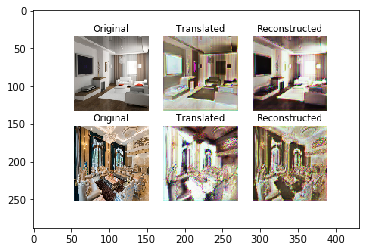

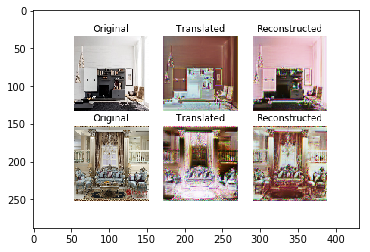

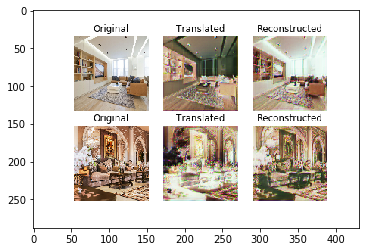

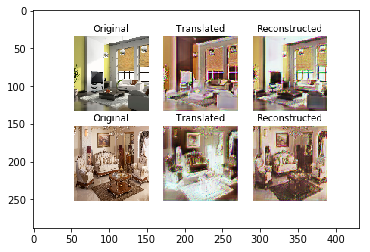

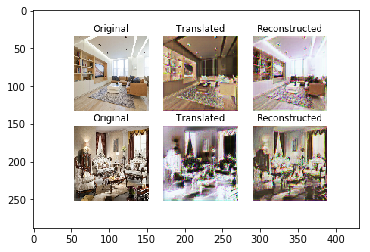

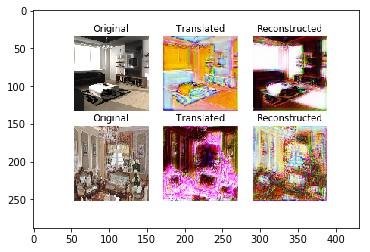

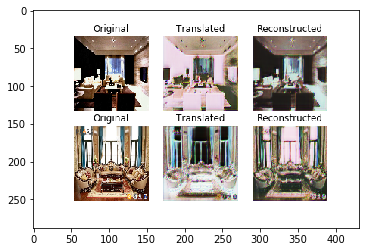

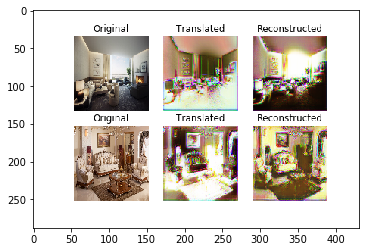

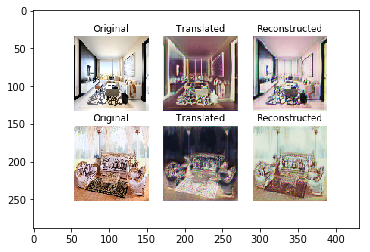

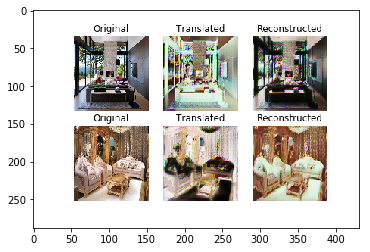

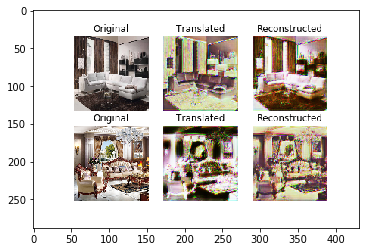

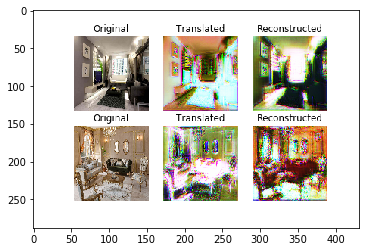

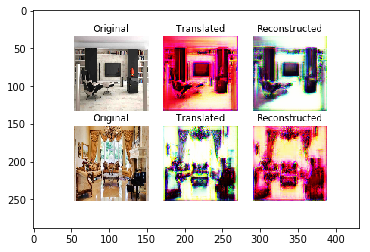

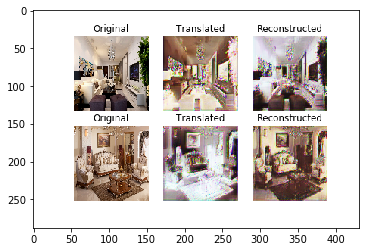

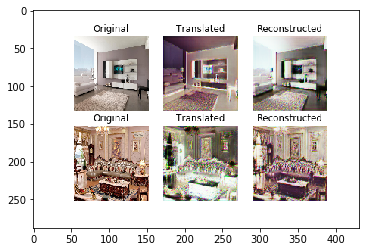

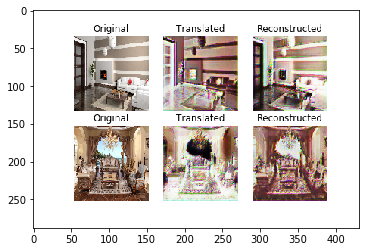

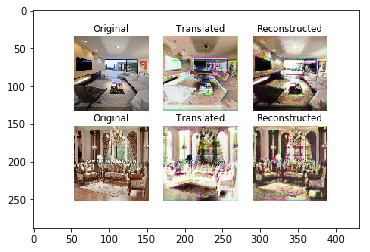

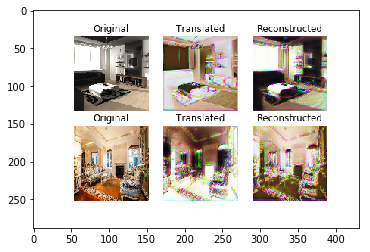

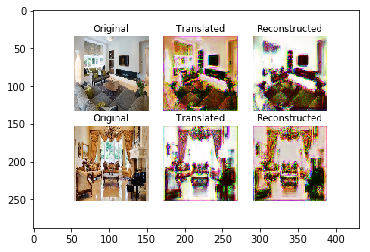

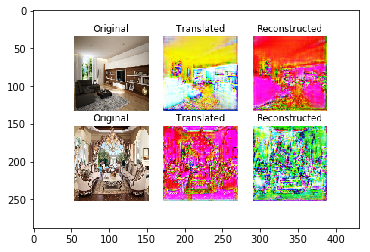

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

for x in epoch_plot:
    plt.imshow(imread(x))
    plt.show()